In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/zomato/zomato.csv", encoding='latin-1')
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
# Make a copy of the original data
df_clean = df.copy()

# Rename for easy access
df_clean.rename(columns={"approx_cost(for two people)": "cost_for_two"}, inplace=True)

# Clean 'cost_for_two' column
df_clean["cost_for_two"] = df_clean["cost_for_two"].astype(str).str.replace(",", "")
df_clean["cost_for_two"] = pd.to_numeric(df_clean["cost_for_two"], errors="coerce")

# Clean 'rate' column
df_clean["rate"] = df_clean["rate"].astype(str).str.replace("/5", "").str.strip()
df_clean["rate"] = pd.to_numeric(df_clean["rate"], errors="coerce")

# Convert 'votes' to numeric
df_clean["votes"] = pd.to_numeric(df_clean["votes"], errors="coerce")

# Drop rows with missing values in important columns
df_clean.dropna(subset=["rate", "cost_for_two", "votes", "location", "cuisines"], inplace=True)

# Preview cleaned data
df_clean.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_for_two,listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


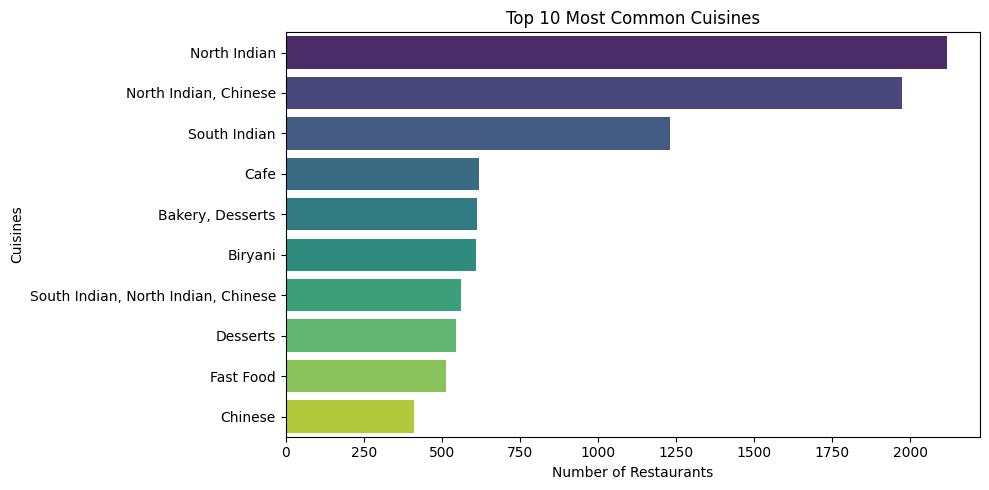

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 cuisines
top_cuisines = df_clean["cuisines"].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.tight_layout()
plt.show()


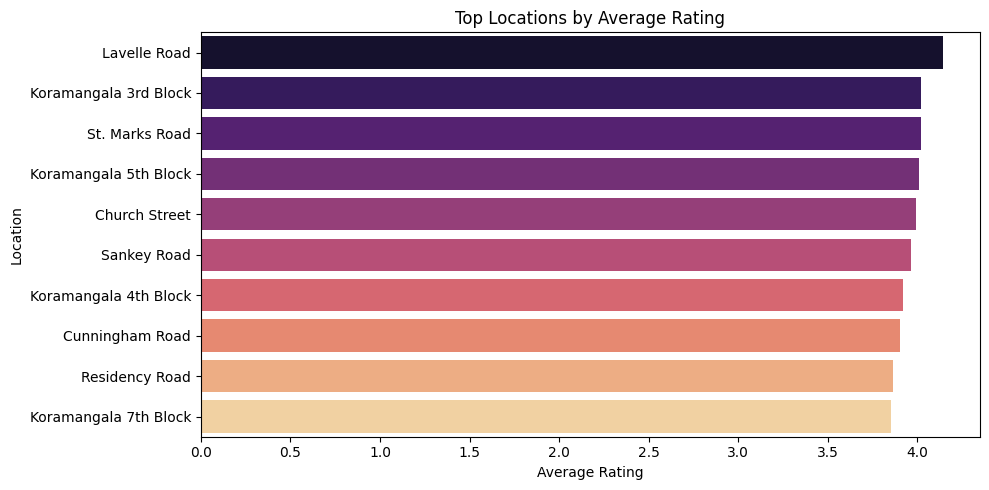

In [5]:
# Top 10 rated locations
top_locations = df_clean.groupby("location")["rate"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


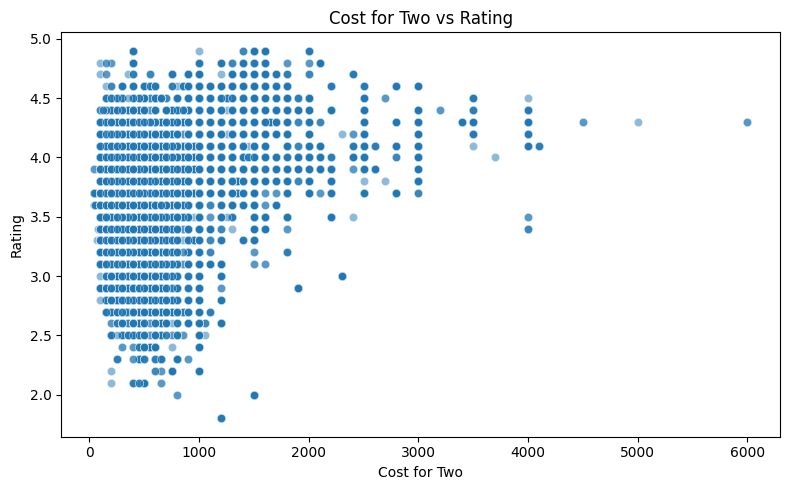

In [6]:
# Scatter plot: cost vs rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x="cost_for_two", y="rate", data=df_clean, alpha=0.5)
plt.title("Cost for Two vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a new binary column: high rating or not
df_clean['high_rating'] = df_clean['rate'].apply(lambda x: 1 if x >= 4 else 0)

# Features and target
X = df_clean[['cost_for_two', 'votes']]
y = df_clean['high_rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

print("✅ Logistic Regression Accuracy:", acc)
print("🔍 Confusion Matrix:\n", conf)


✅ Logistic Regression Accuracy: 0.8279401110842791
🔍 Confusion Matrix:
 [[5587  297]
 [1128 1270]]


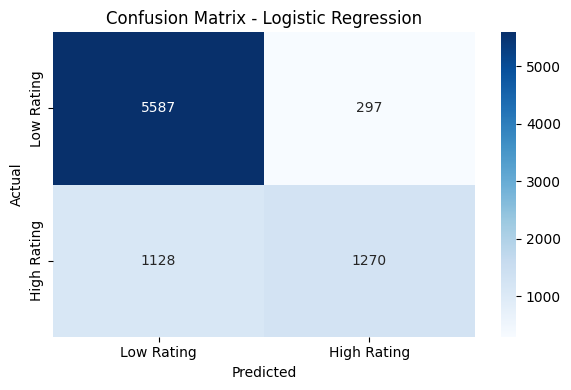

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Rating', 'High Rating'], yticklabels=['Low Rating', 'High Rating'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


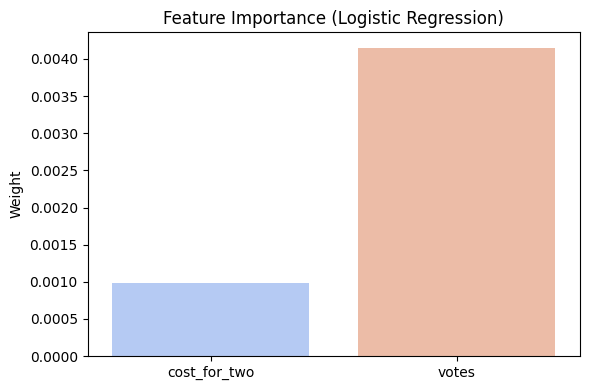

In [9]:
# Plot feature weights
features = ['cost_for_two', 'votes']
weights = model.coef_[0]

plt.figure(figsize=(6, 4))
sns.barplot(x=features, y=weights, palette='coolwarm')
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()
